In [1]:
""" Initialize """

import nltk
nltk.download('stopwords')
nltk.download('punkt')

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from fuzzywuzzy import fuzz
import itertools
import numpy as np
import matplotlib.pyplot as plt

import spacy
nlp = spacy.load("en_core_web_sm")

from textblob import TextBlob
import csv

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
""" Data preprocessing """

def preprocess(data):
    data = [item.lower() for item in data]
    stop_words = set(stopwords.words('english'))
    paragraph = ' '.join(data)
    word_tokens = word_tokenize(paragraph) 
    preprocessed_data = ' '.join([word for word in word_tokens if not word in stop_words])
    return preprocessed_data


In [3]:
""" FuzzyWuzzy """

# use fuzzywuzzy to get string matching scores for the snippets
# variable i tells about how many snippets are considered, for each i, 10 snippets are processed
def wuzzy_string_matching(snippets):
    score_list = []
    V1 = 0
    #if i * 10 >= len(snippets):
    combs = itertools.combinations(range(0,len(snippets)),2)
    #else:
    #    combs = itertools.combinations(range(0,i*10),2)
    for id1, id2 in combs:
        #ratio = fuzz.ratio(snippets[id1], snippets[id2])
        ratio = fuzz.token_sort_ratio(snippets[id1], snippets[id2])
        # V1 corresponding to the total number of similar snippets (string matching score equals 100%)
        if ratio == 100 and snippets[id1] != "":
            V1 += 1
        score_list.append(ratio)

    # V2 for the average string matching of all pairs
    V2 = np.average(score_list)
    # V3 for the standard deviation corresponding to this average value.
    V3 = np.std(score_list)

    return V1,V2,V3

# plot string matching scores
def plot_string_matching(snippets, title):
    V1_list = []
    V2_list = []
    V3_list = []

    for i in range(9, 109, 10):
        V1, V2, V3 = wuzzy_string_matching(snippets[:i])
        V1_list.append(V1)
        V2_list.append(V2)
        V3_list.append(V3)

    x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
 
    plt.rcParams["figure.figsize"] = (15,5)
    plt.suptitle("String matching")
    plt.subplot(131)
    plt.title(title + ", similar snippets")
    plt.plot(x, V1_list)
    plt.subplot(132)
    plt.title(title + ", average score")
    plt.plot(x, V2_list)
    plt.subplot(133)
    plt.title(title + ", standard deviation")
    plt.plot(x, V3_list)
    plt.tight_layout()
    plt.show()


In [4]:
"""Spacy named entities"""

def plot_named_entities(snippets, title):
    #initialize empty list for the entities
    entities = []

    #loop for going through all snippets
    for snippet in snippets:
        doc = nlp(snippet)
        #Calculate the entities
        lista = [ent.text for ent in doc.ents]
        entities.append(" ".join(lista))    

    V1_4_list = []
    V2_4_list = []
    V3_4_list = []

    #for i in range(1, 11):
    #    V1, V2, V3 = wuzzy_string_matching(i, entities)
    #    V1_4_list.append(V1)
    #    V2_4_list.append(V2)
    #    V3_4_list.append(V3)

    for i in range(9, 109, 10):
        V1, V2, V3 = wuzzy_string_matching(entities[:i])
        V1_4_list.append(V1)
        V2_4_list.append(V2)
        V3_4_list.append(V3)

    x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

    plt.suptitle("Named entities")
    plt.subplot(131)
    plt.title(title + ", similar snippets")
    plt.plot(x, V1_4_list)
    plt.subplot(132)
    plt.title(title + ", average score")
    plt.plot(x, V2_4_list)
    plt.subplot(133)
    plt.title(title + ", standard deviation")
    plt.plot(x, V3_4_list)
    plt.tight_layout()
    plt.show()

In [5]:
""" WordCloud """

def get_word_cloud(data, title):
    wordcloud = WordCloud(width=1600, height=900, max_font_size=200, background_color="black").generate(data)
    plt.figure(figsize=(13,11))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    return plt

def show_wordcloud(snippets, title):
    plt = get_word_cloud(snippets, title)
    plt.show()



In [6]:
""" Sentiment analysis """

# perform sentiment polarity analysis for the snippet data
def sentiment_analyze(snippets, title):
    polarity = []

    for snippet in snippets:
        text_blob = TextBlob(snippet)
        snippet_score = 0
        for sentence in text_blob.sentences:
            snippet_score += (sentence.sentiment.polarity)
        polarity.append(snippet_score)

    #vector V4, average values and vector V5 std values
    V4 = []
    V5 = []
    for i in range (10,110,10):
        V4.append(np.average(polarity[0:i]))
        V5.append(np.std(polarity[0:i]))

    x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

    plt.suptitle("Sentiment polarity")
    plt.figure(1)
    plt.plot(x,V4)
    plt.title(title + ", avg values")
    plt.show()

    plt.figure(2)
    plt.plot(x,V5)
    plt.title(title + ", std values")
    plt.show()


In [7]:
def analyze(text, title):
    preprocessed_text = preprocess(text)
    plot_string_matching(text, title)
    plot_named_entities(text, title)
    show_wordcloud(preprocessed_text, title)
    sentiment_analyze(text, title)
    return

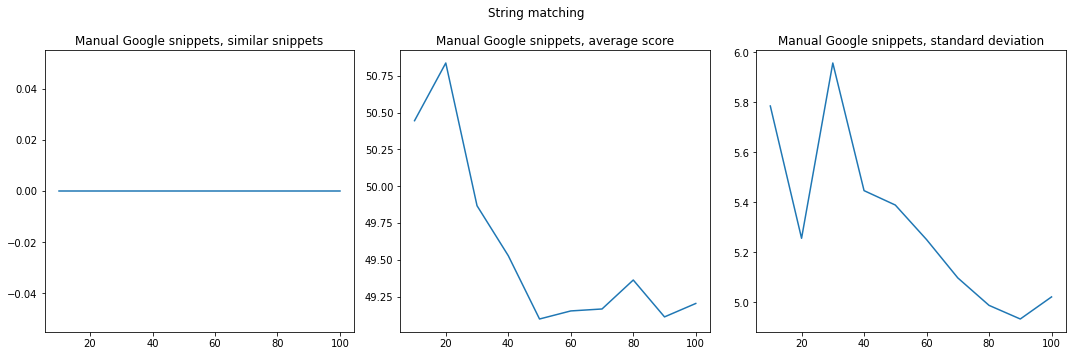

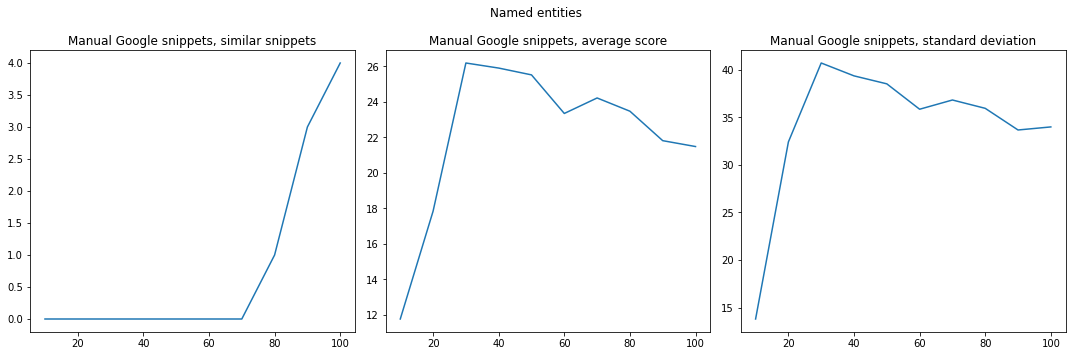

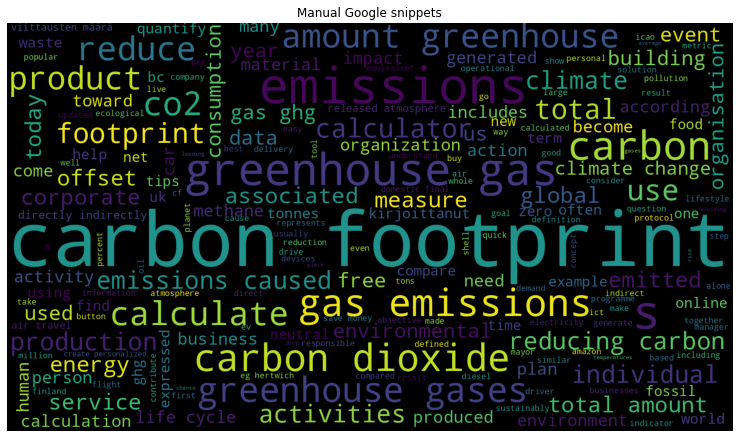

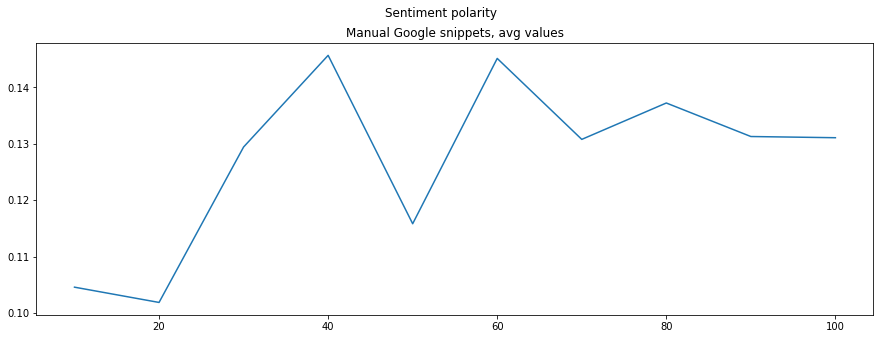

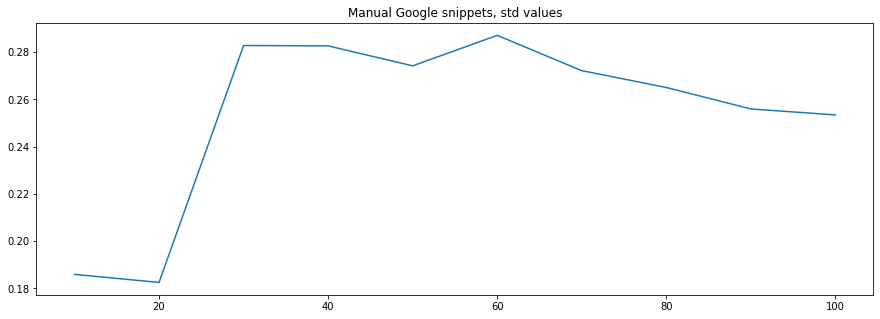

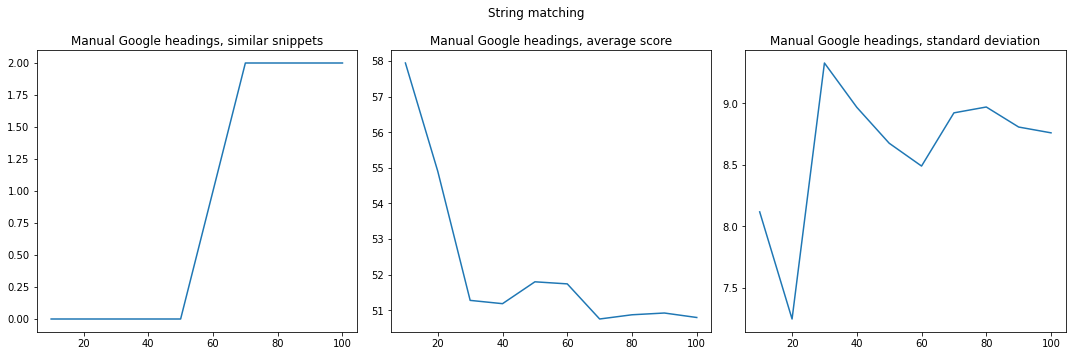

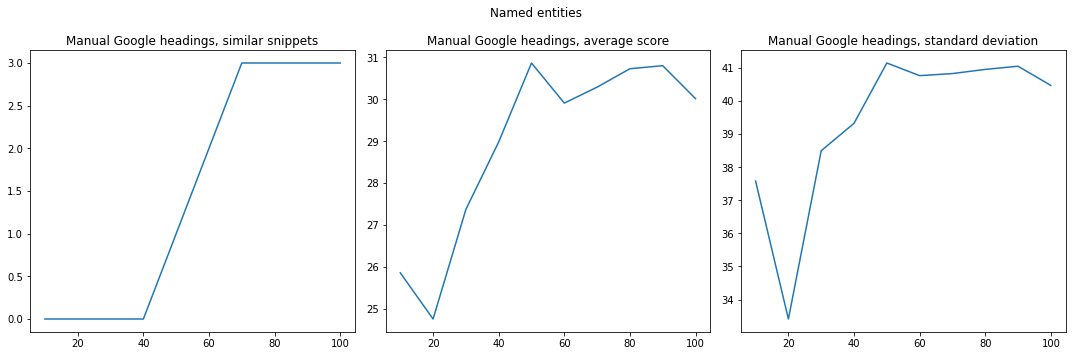

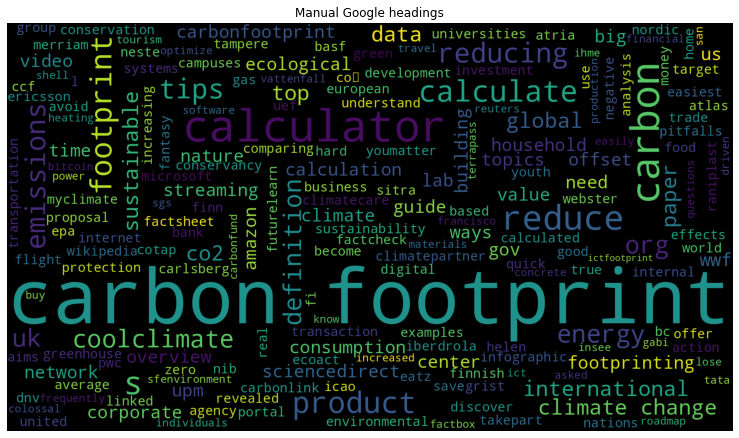

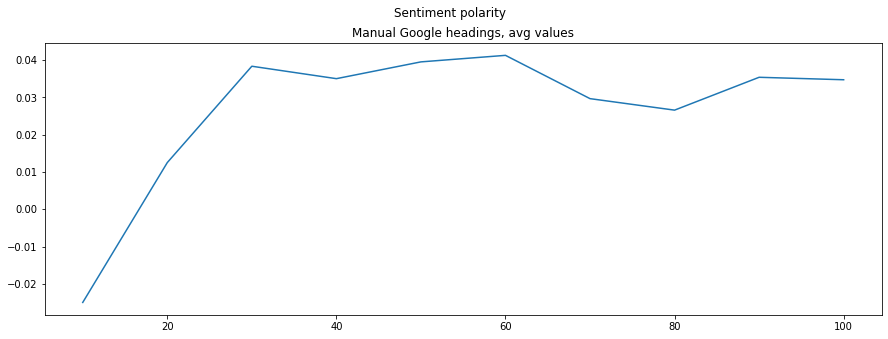

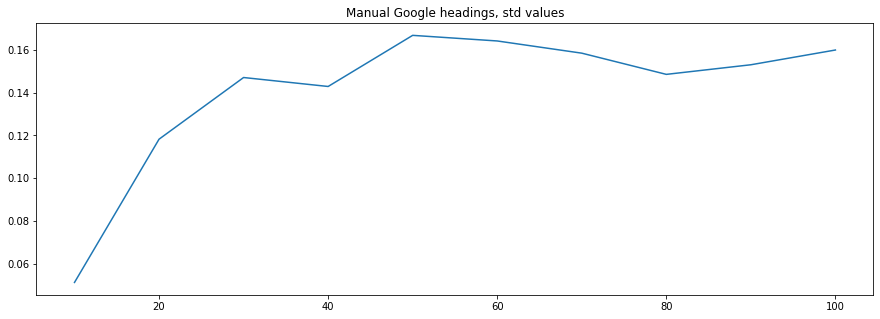

In [8]:
""" Manually scraped Google snippets """

# Manually scraped data
# Done 06.10.2021, Oulu Finland
# URL = https://www.google.com/search?q=carbon+footprint
# Selecting next page by clicking
# Browser: Firefox (93.0, 64-bit)

with open('NLP_Carbon_Footprint_Google.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    manually_scraped_headings = []
    manually_scraped_snippets = []
    for row in csv_reader:
        manually_scraped_headings.append(row[1])
        manually_scraped_snippets.append(row[2])
    #manually_scraped_snippets = [row[2] for row in csv_reader]
    #manually_scraped_headings = [row[1] for row in csv_reader]
    #print(*manually_scraped_snippets[:15], sep='\n')
    #print(len(manually_scraped_snippets))
    # ------
    analyze(manually_scraped_snippets, 'Manual Google snippets')
    analyze(manually_scraped_headings, 'Manual Google headings')

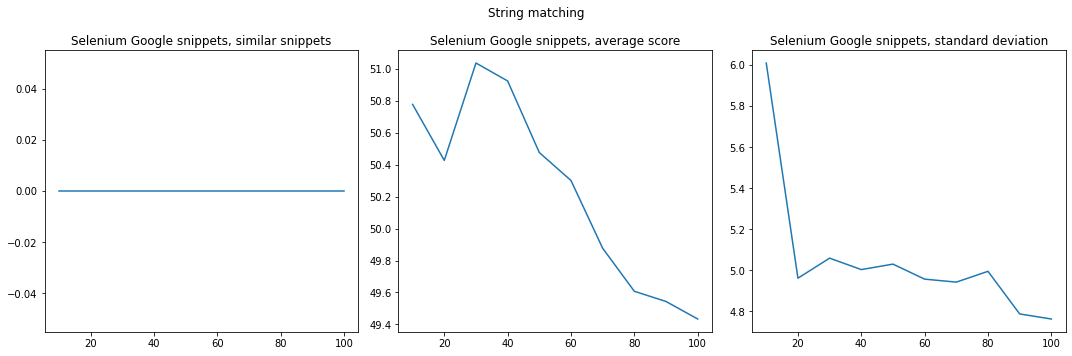

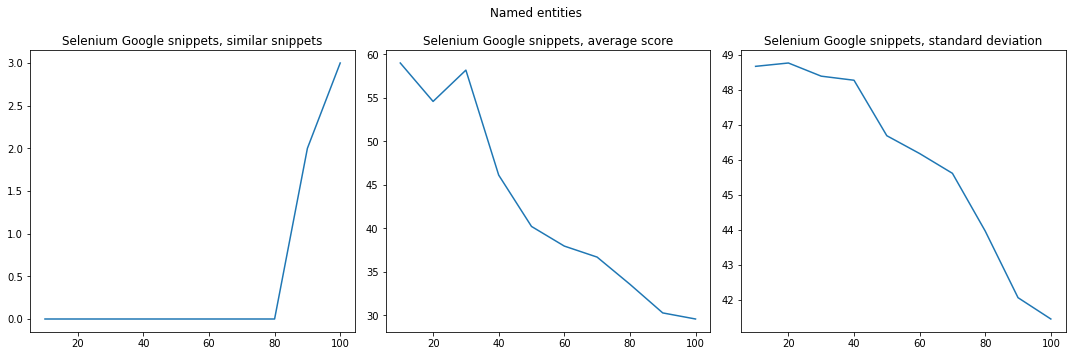

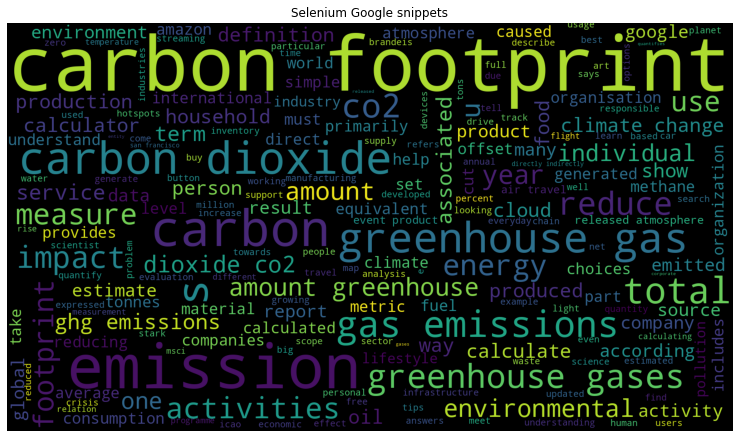

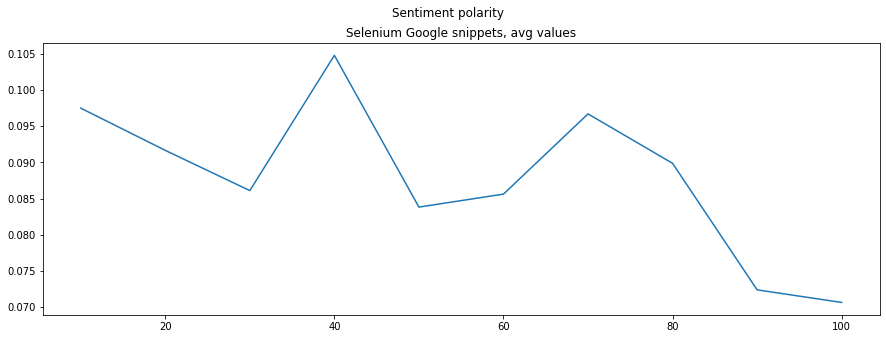

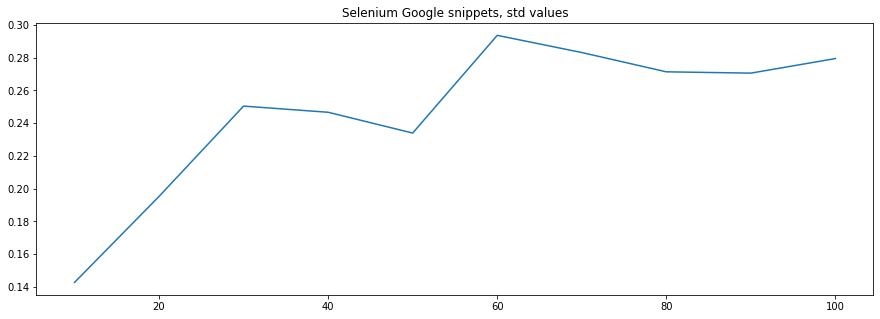

In [9]:
""" Selenium Google scrape """

with open("google_selenium_scrape.csv") as gs_file:
    lines = gs_file.readlines()
    selenium_google_scraped_snippets = [line.rstrip() for line in lines]
    #print(*selenium_google_scraped_snippets[:15], sep='\n')
    #print(len(selenium_google_scraped_snippets))
    # ------
    analyze(selenium_google_scraped_snippets, 'Selenium Google snippets')

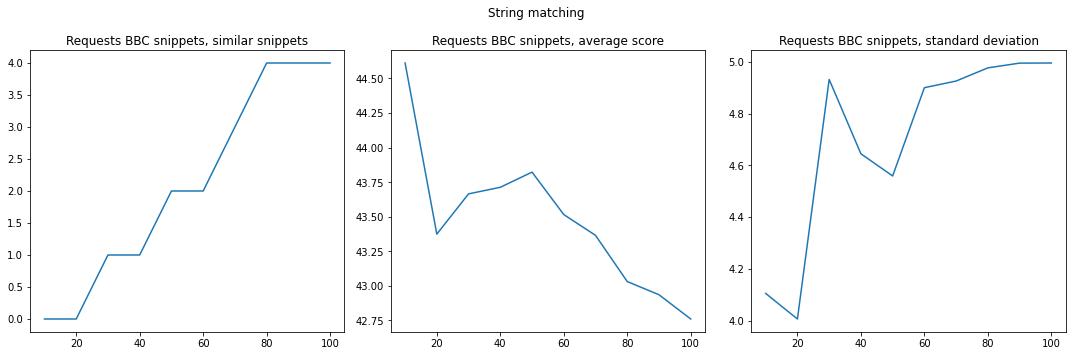

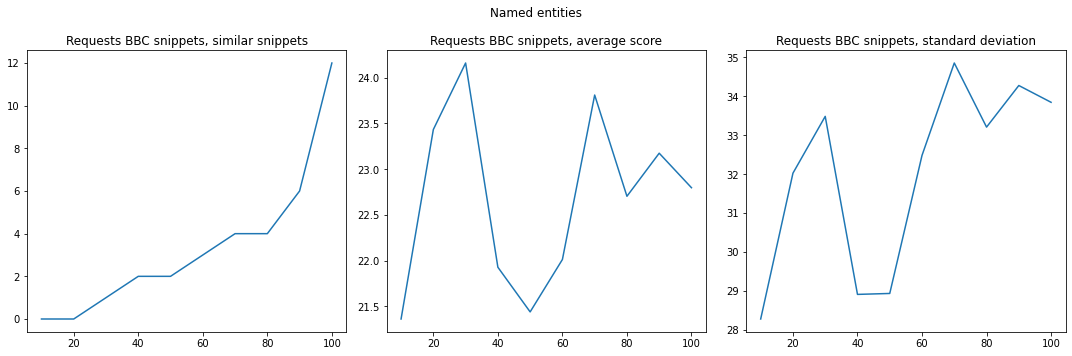

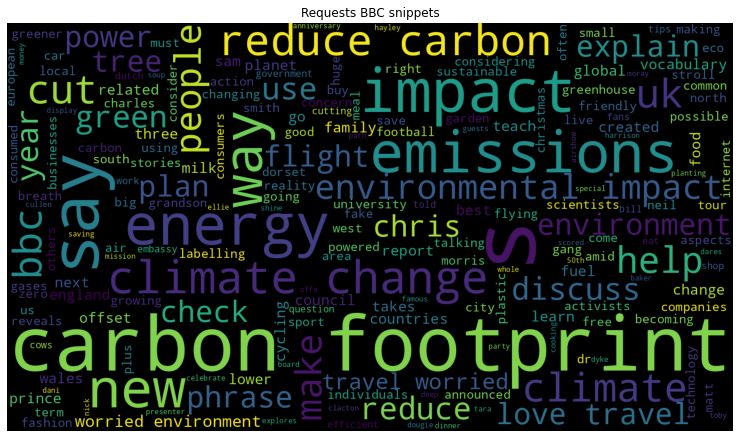

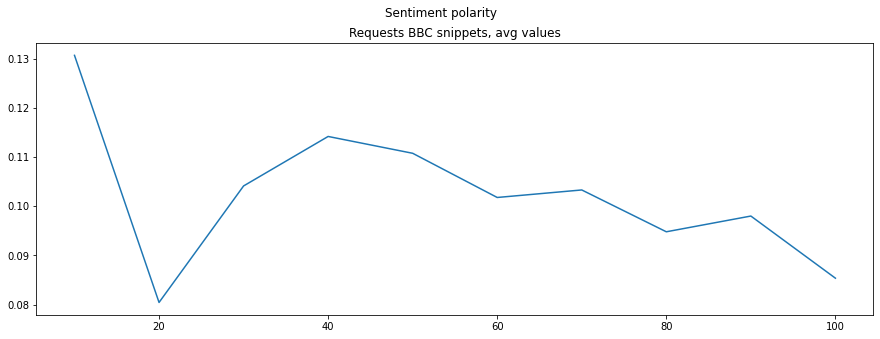

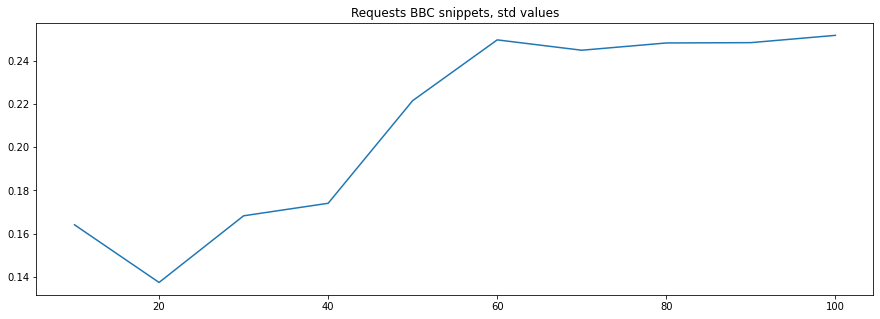

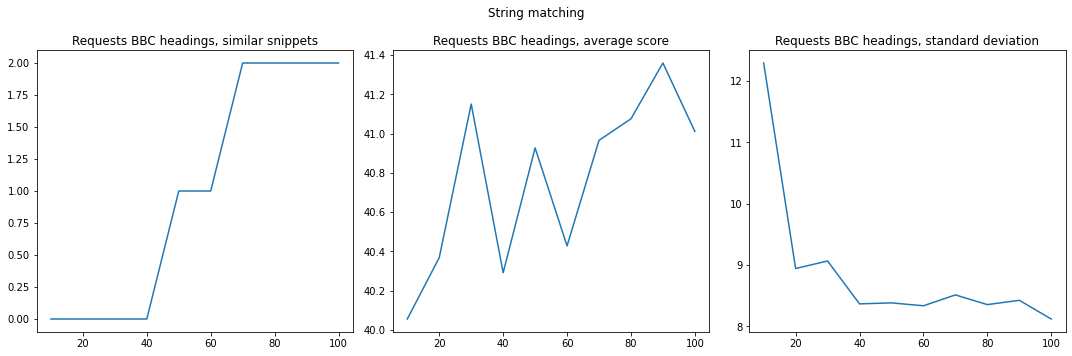

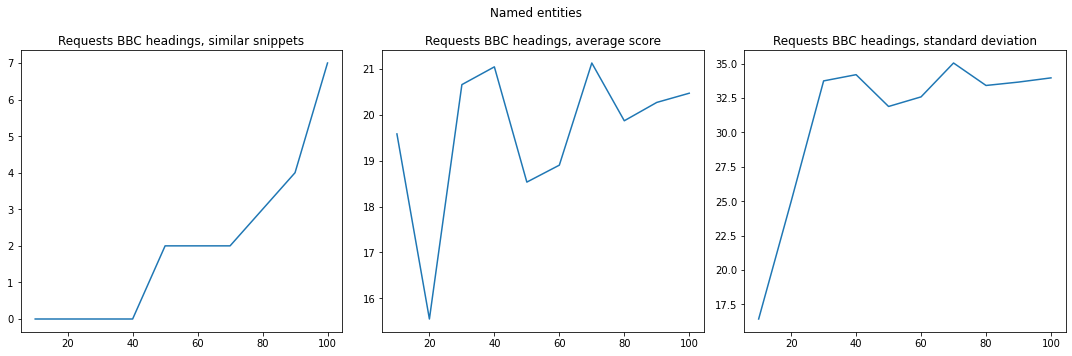

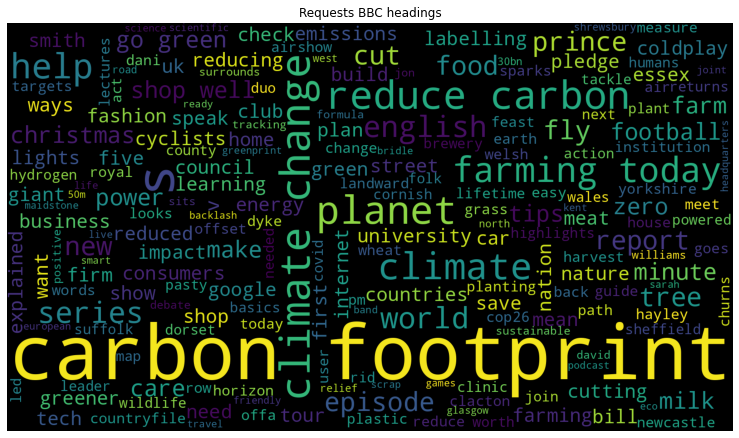

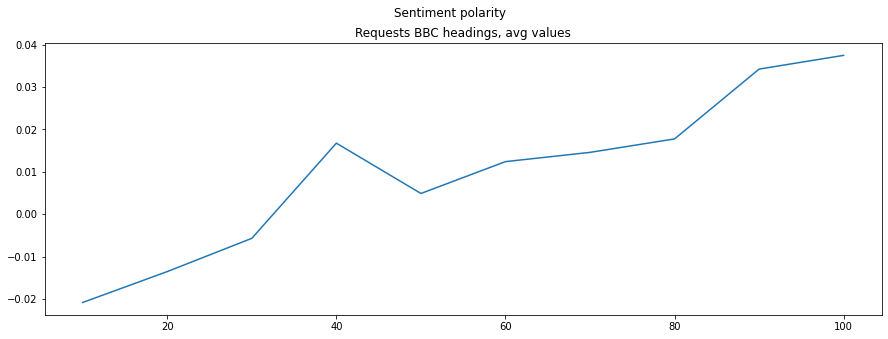

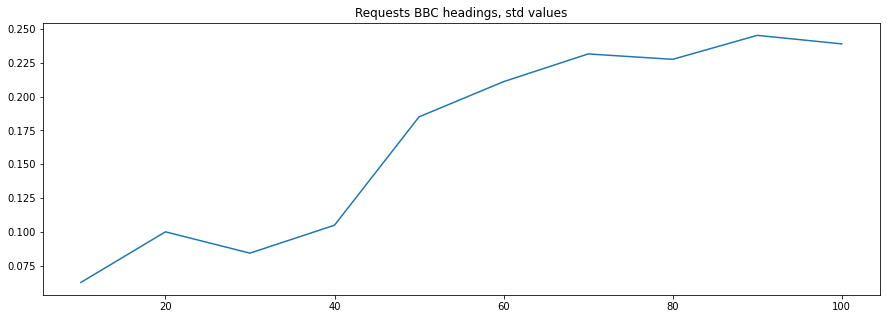

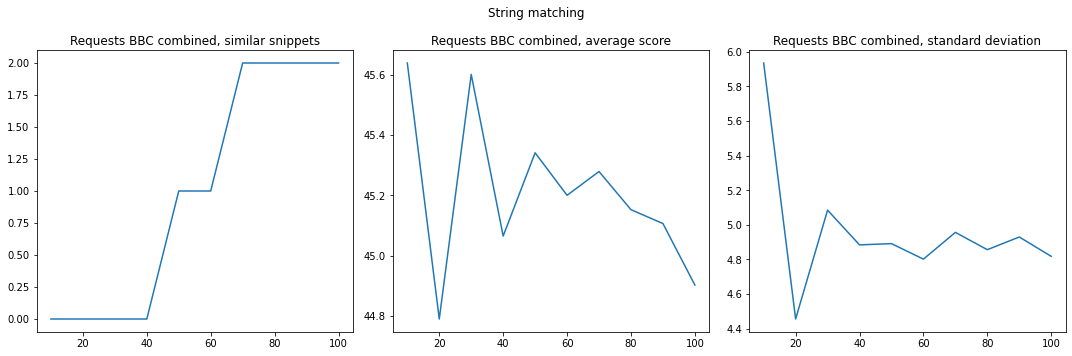

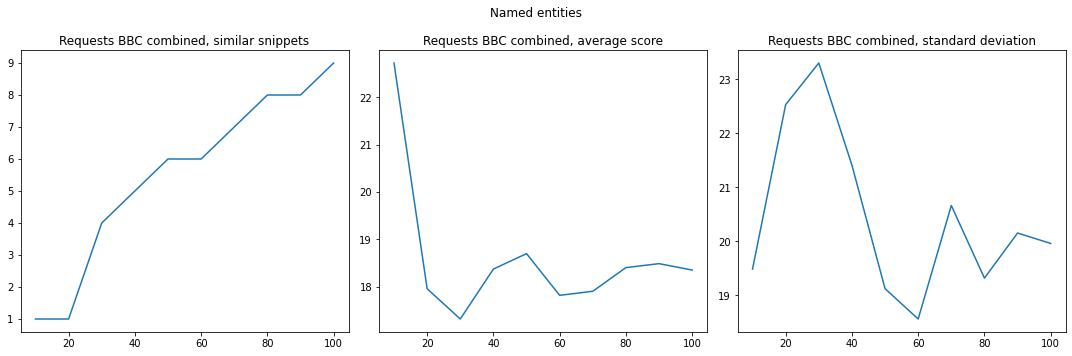

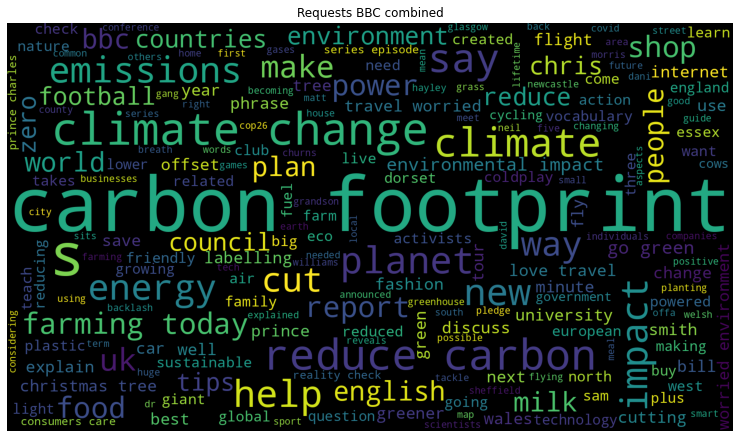

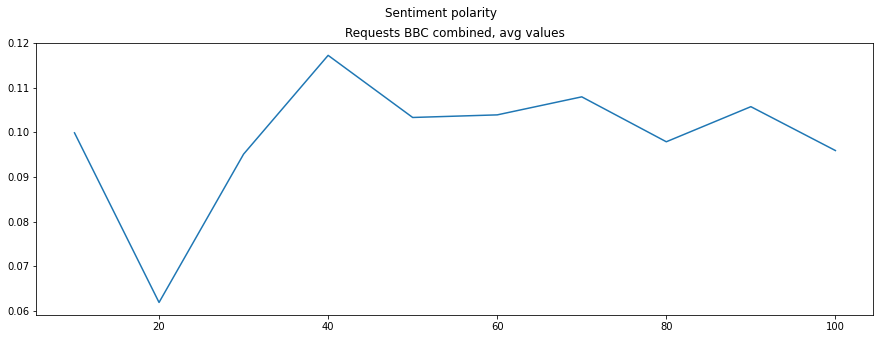

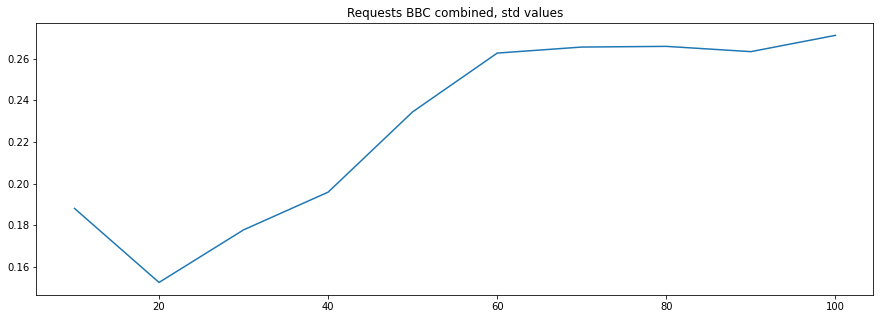

In [10]:
""" Requests BBC scrape """

with open("bbc_requests_snippets_scrape.csv") as s_file:
    lines = s_file.readlines()
    requests_bbc_scraped_snippets = [line.rstrip() for line in lines]
    #print(*requests_bbc_scraped_snippets[:15], sep='\n')
    #print(len(requests_bbc_scraped_snippets))
    # ------
    analyze(requests_bbc_scraped_snippets, 'Requests BBC snippets')

with open("bbc_requests_headings_scrape.csv") as s_file:
    lines = s_file.readlines()
    requests_bbc_scraped_headings = [line.rstrip() for line in lines]
    #print(*requests_bbc_scraped_headings[:15], sep='\n')
    #print(len(requests_bbc_scraped_headings))
    # ------
    analyze(requests_bbc_scraped_headings, 'Requests BBC headings')

combined_bbc = [' '.join(map(str, i)) for i in zip(requests_bbc_scraped_headings, requests_bbc_scraped_snippets)]
analyze(combined_bbc, 'Requests BBC combined')

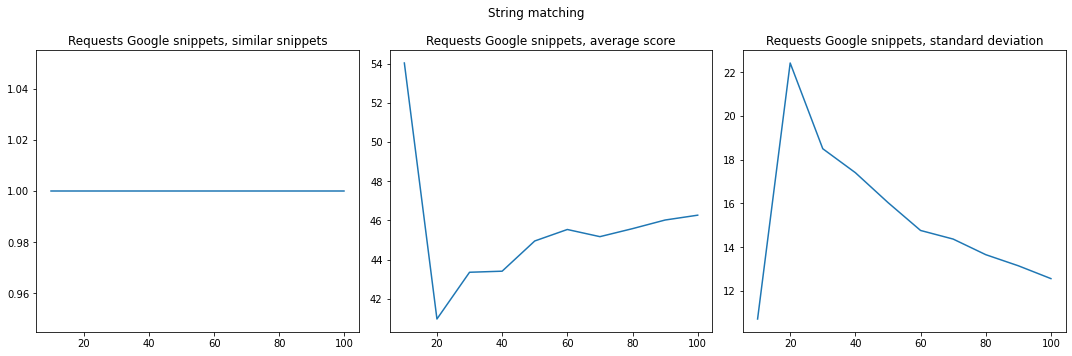

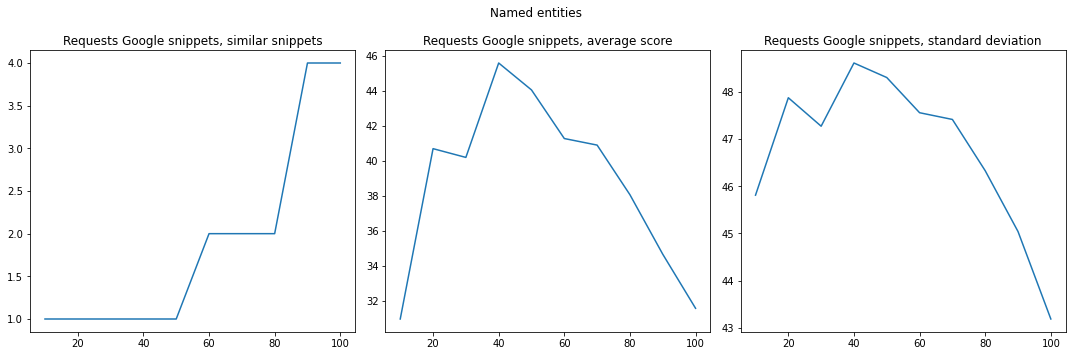

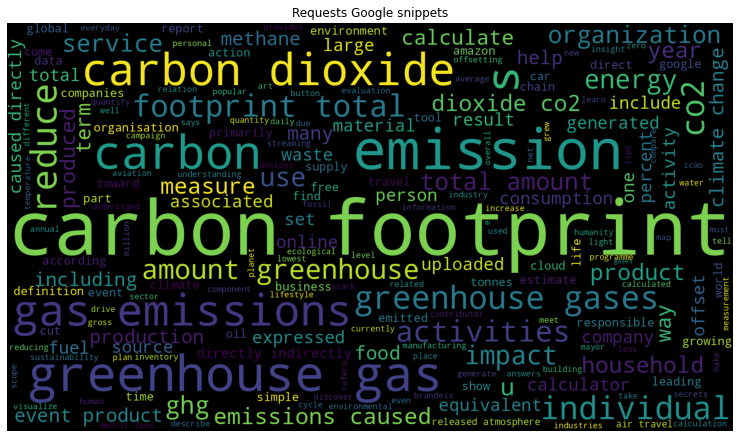

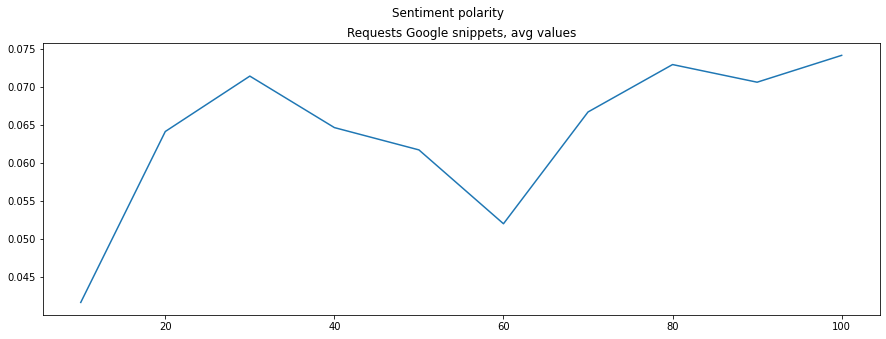

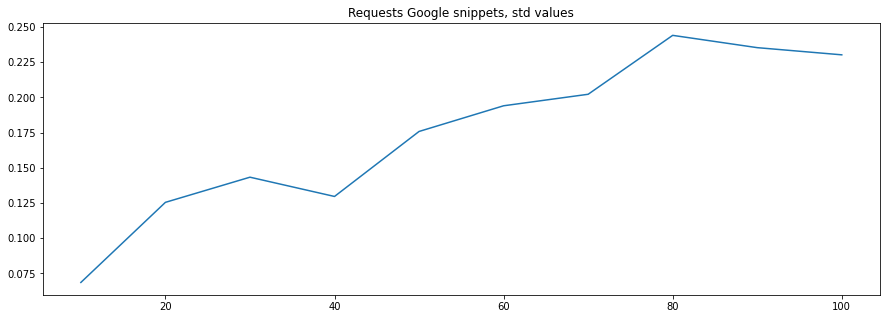

In [11]:
""" Requests Google scrape """

with open("google_requests_scrape.csv") as s_file:
    lines = s_file.readlines()
    requests_google_scraped_snippets = [line.rstrip() for line in lines]
    #print(*requests_google_scraped_snippets[:15], sep='\n')
    #print(len(requests_google_scraped_snippets))
    # ------
    analyze(requests_google_scraped_snippets, 'Requests Google snippets')

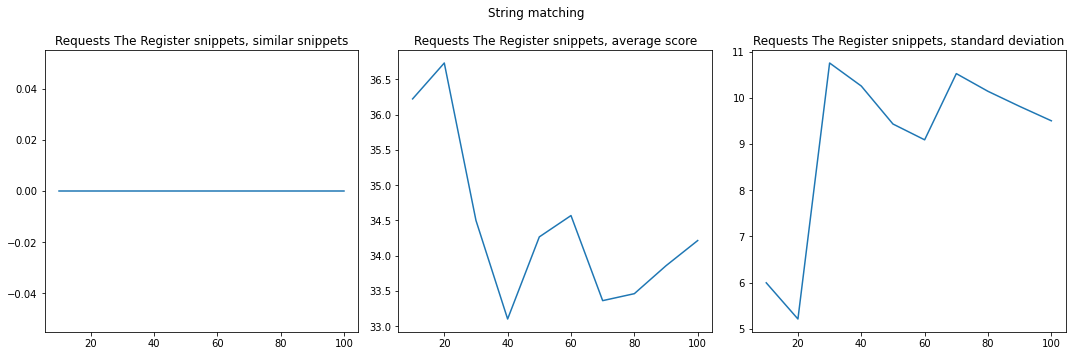

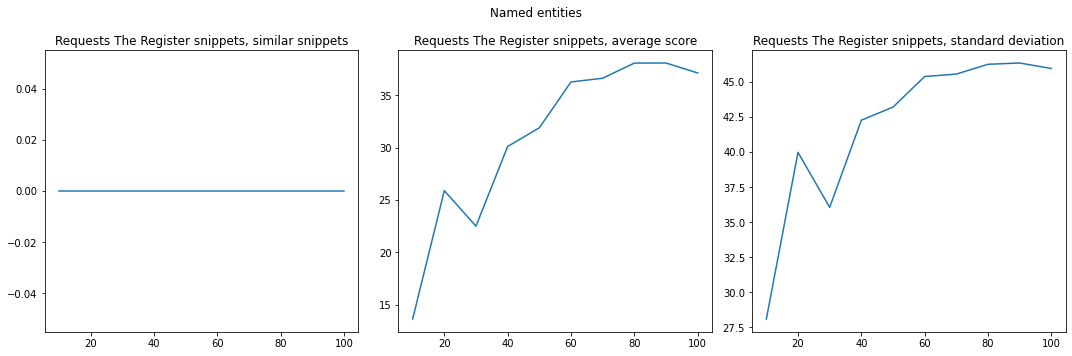

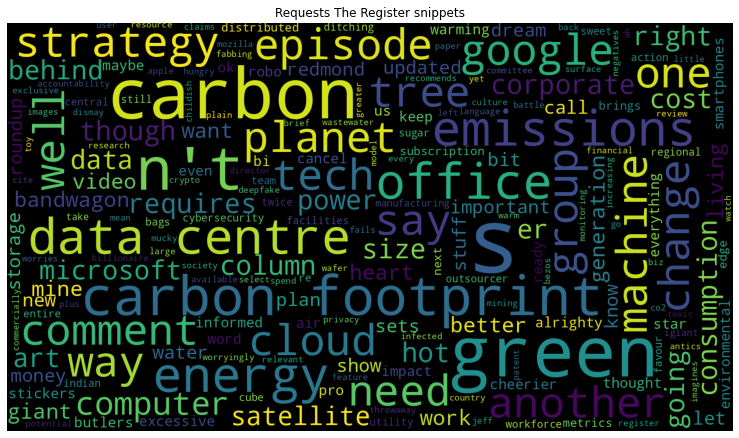

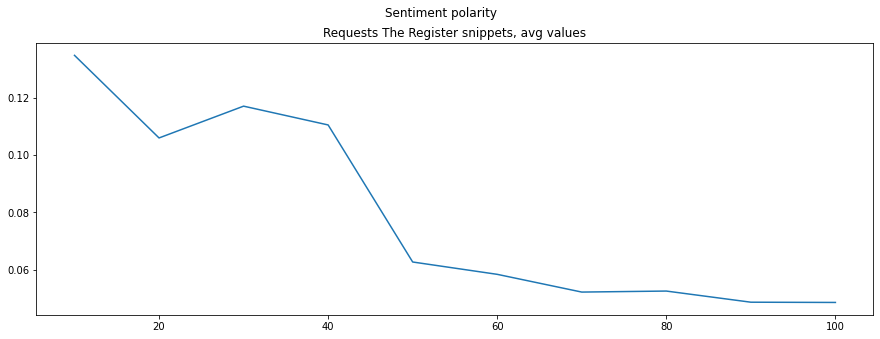

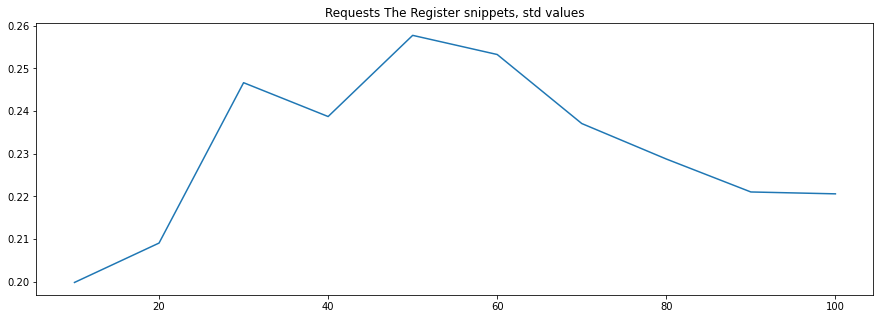

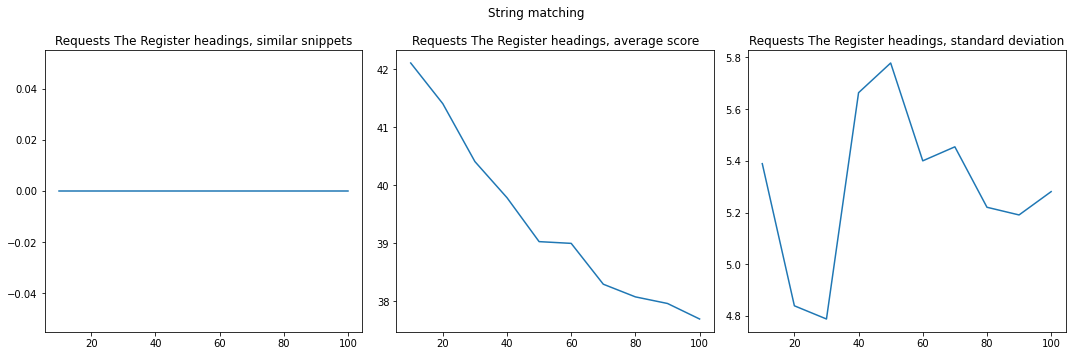

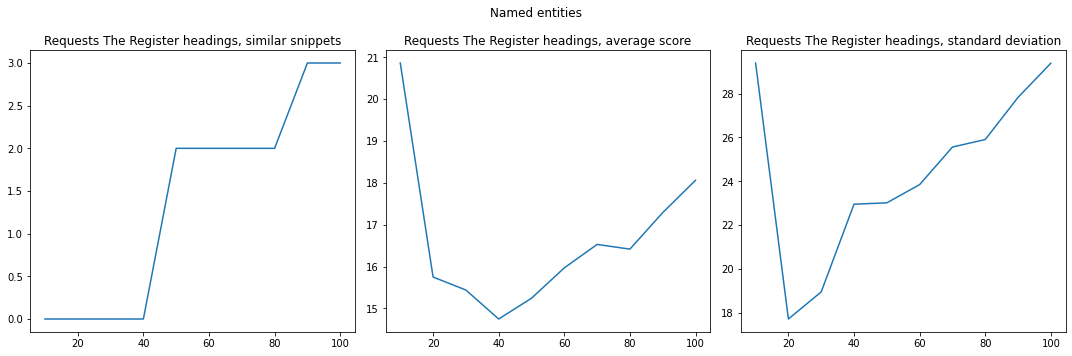

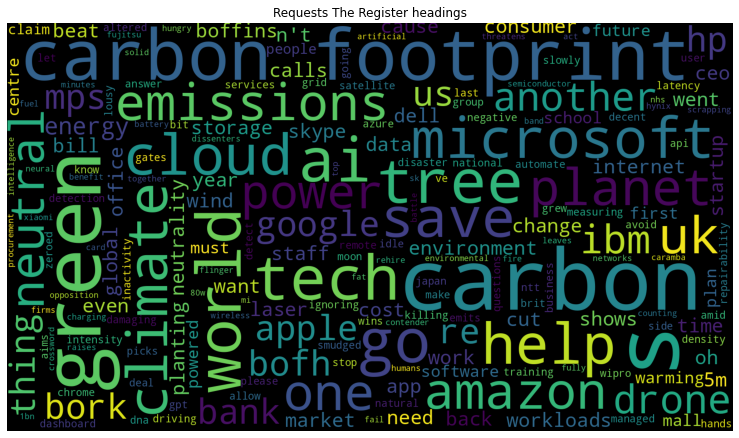

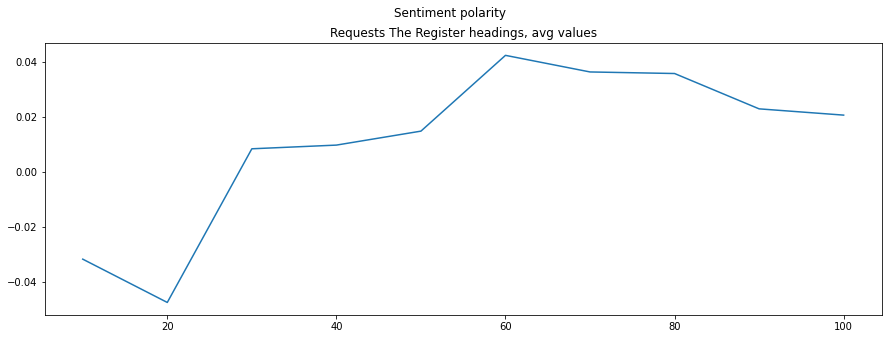

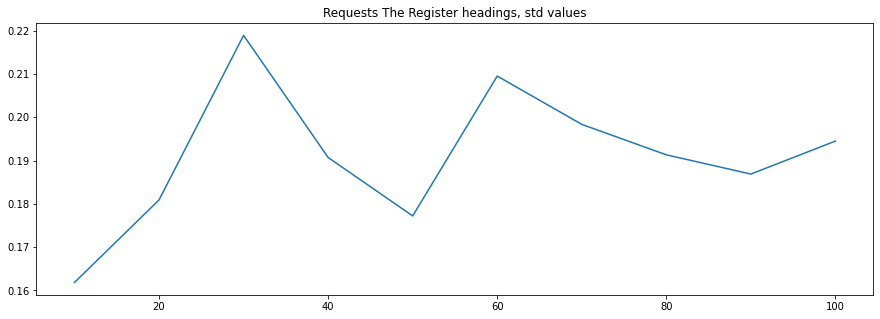

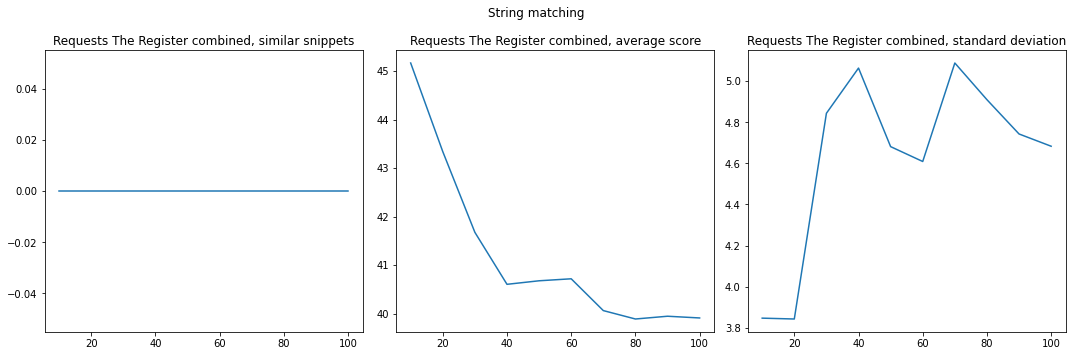

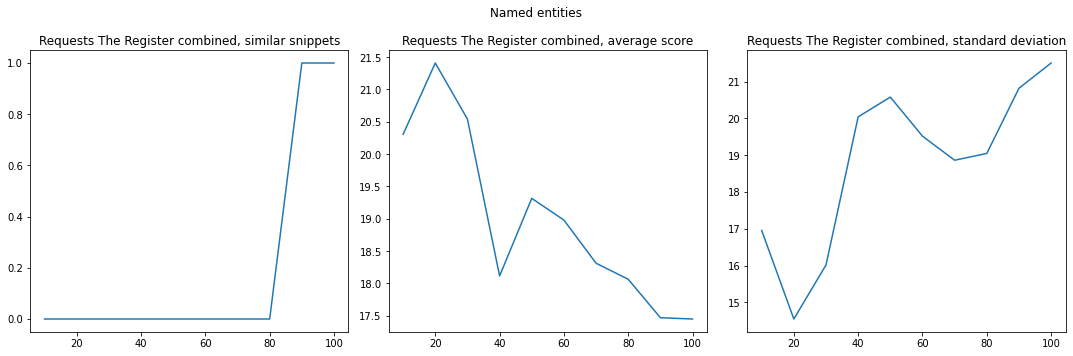

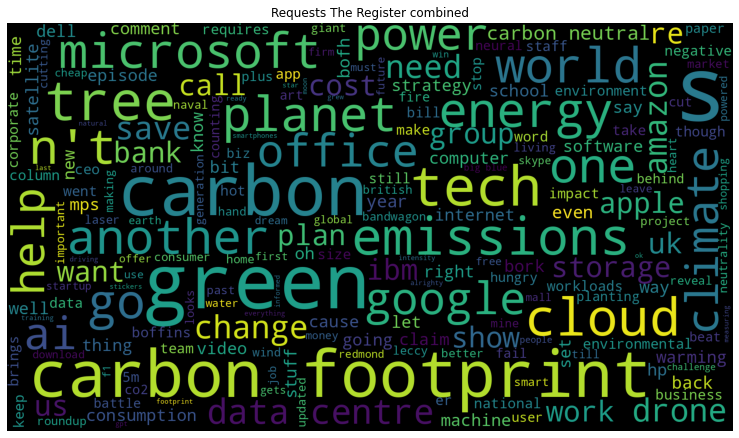

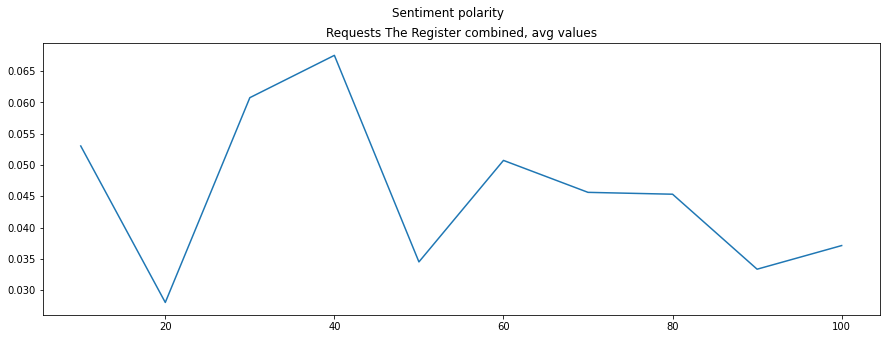

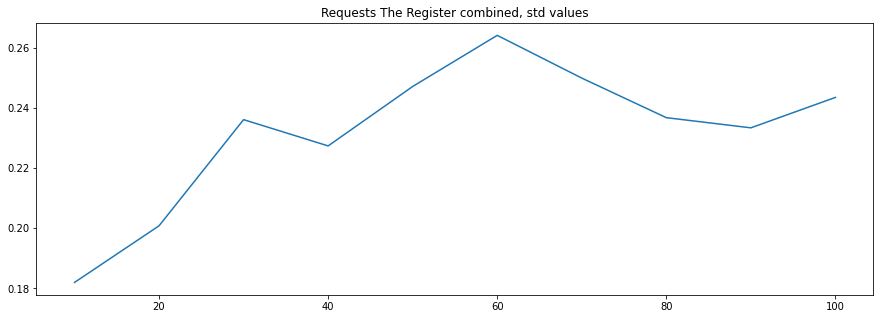

In [12]:
""" Requests The Register scrape """

with open("register_requests_snippets_scrape.csv") as s_file:
    lines = s_file.readlines()
    requests_register_scraped_snippets = [line.rstrip() for line in lines]
    #print(*requests_register_scraped_snippets[:15], sep='\n')
    #print(len(requests_register_scraped_snippets))
    # ------
    analyze(requests_register_scraped_snippets, 'Requests The Register snippets')

with open("register_requests_headings_scrape.csv") as s_file:
    lines = s_file.readlines()
    requests_register_scraped_headings = [line.rstrip() for line in lines]
    #print(*requests_register_scraped_headings[:15], sep='\n')
    #print(len(requests_register_scraped_headings))
    # ------
    analyze(requests_register_scraped_headings, 'Requests The Register headings')

combined_bbc = [' '.join(map(str, i)) for i in zip(requests_register_scraped_headings, requests_register_scraped_snippets)]
analyze(combined_bbc, 'Requests The Register combined')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=df8df42c-8503-4bb3-8c9d-497cf36bf82c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>